## Preforming Linear Regression on CO2 Emissions data
### Source: https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population
### Description: This data was pulled from the US Energy Administration and joined together for an easier analysis. Its a collection of some big factors that play into C02 Emissions, with everything from the Production and Consumption of each type of major energy source for each country and its pollution rating each year. It also includes each countries GDP, Population, Energy intensity per capita (person), and Energy intensity per GDP (per person GDP). All the data spans all the way from the 1980's to 2020.

### Pip install

In [ ]:
!pip install pandas numpy scikit-learn matplotlib

### Imports

In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

### Read Data

In [212]:
df = pd.read_csv("energy.csv")
df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


### Columns

In [213]:
df.columns

Index(['Unnamed: 0', 'Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission'],
      dtype='object')

### Datatypes

In [214]:
df.dtypes

Unnamed: 0                       int64
Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

# Drop columns and filter

In [215]:
# Assuming df is your DataFrame
columns_to_check = [
    'Energy_type', 'Year', 'Energy_consumption', 'Energy_production', 
    'GDP', 'Population', 'Energy_intensity_per_capita', 
    'Energy_intensity_by_GDP', 'CO2_emission'
]

# Drop rows where any of the specified columns have NaN or 0 values
df = df.dropna(subset=columns_to_check)
df = df[~(df[columns_to_check] == 0).any(axis=1)]
df = df.drop(["Unnamed: 0"], axis=1)

# Drop where Energy_type = all_energy_types
df = df[df['Energy_type'] != 'all_energy_types']

In [216]:
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
1321,United States,coal,1980,15.422809,18.597725,7080.750000,2.271190e+05,343.525258,11.018764,1409.790188
1322,United States,natural_gas,1980,20.235459,19.907600,7080.750000,2.271190e+05,343.525258,11.018764,1081.593377
...,...,...,...,...,...,...,...,...,...,...
55407,Vietnam,petroleum_n_other_liquids,2019,0.983412,0.504521,915.504000,9.642590e+04,36.391525,3.832955,65.816659
55424,Yemen,natural_gas,2019,0.003445,0.003439,53.083800,2.916220e+04,5.452938,2.995635,0.182775
55425,Yemen,petroleum_n_other_liquids,2019,0.150272,0.125383,53.083800,2.916220e+04,5.452938,2.995635,7.888358
55429,Zambia,coal,2019,0.034151,0.024538,247.181900,1.787385e+04,11.586567,0.837831,2.894102


### Apply min max scaler to numerical features

In [217]:
def min_max_scale(df, columns):
    """
    Scale specified columns in the DataFrame to the [0, 1] range and return the scaling statistics.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of columns to be scaled.

    Returns:
    tuple: A tuple containing the scaled DataFrame and a dictionary with the scaling statistics.
    """
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[columns] = scaler.fit_transform(df[columns])
    
    # Extract min and max for each column
    statistics = {col: {'min': scaler.data_min_[i], 'max': scaler.data_max_[i]} for i, col in enumerate(columns)}
    
    return df_scaled, statistics

min_max_scale_features = ['Energy_consumption','Energy_production', 'GDP', 'Population', 
'Energy_intensity_per_capita', 'Energy_intensity_by_GDP']
df, df_min_max_stats = min_max_scale(df,min_max_scale_features)

In [218]:
df

,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
1,World,coal,1980,0.399414,0.414990,0.217484,0.557126,0.059522,0.067345,1409.790188
2,World,natural_gas,1980,0.273526,0.283661,0.217484,0.557126,0.059522,0.067345,1081.593377
3,World,petroleum_n_other_liquids,1980,0.670618,0.689513,0.217484,0.557126,0.059522,0.067345,2455.243565
1321,United States,coal,1980,0.078317,0.096336,0.055450,0.029409,0.301302,0.070425,1409.790188
1322,United States,natural_gas,1980,0.102755,0.103121,0.055450,0.029409,0.301302,0.070425,1081.593377
...,...,...,...,...,...,...,...,...,...,...
55407,Vietnam,petroleum_n_other_liquids,2019,0.004994,0.002613,0.007167,0.012468,0.031642,0.023513,65.816659
55424,Yemen,natural_gas,2019,0.000017,0.000018,0.000413,0.003749,0.004479,0.018047,0.182775
55425,Yemen,petroleum_n_other_liquids,2019,0.000763,0.000649,0.000413,0.003749,0.004479,0.018047,7.888358
55429,Zambia,coal,2019,0.000173,0.000127,0.001933,0.002285,0.009864,0.003960,2.894102


In [219]:
df_min_max_stats

{'Energy_consumption': {'min': 1.396320016e-05, 'max': 196.92883215112363},
 'Energy_production': {'min': 1.8598456108520094e-18,
  'max': 193.0508931904455},
 'GDP': {'min': 0.366398, 'max': 127690.247059},
 'Population': {'min': 244.405, 'max': 7714631.06383},
 'Energy_intensity_per_capita': {'min': 0.3518580058908181,
  'max': 1139.3205980183816},
 'Energy_intensity_by_GDP': {'min': 0.2312849865189105,
  'max': 153.40880353479884}}

### Apply one hot encoding to categorical features

In [220]:
def one_hot_encode_columns(df, columns):
    """
    One-hot encodes specified columns of a DataFrame, drops the original columns,
    and returns the modified DataFrame along with a dictionary of encodings.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of columns to be one-hot encoded.

    Returns:
    pd.DataFrame: The modified DataFrame with one-hot encoded columns.
    dict: A dictionary mapping original columns to their one-hot encoded counterparts.
    """
    # Dictionary to store the one-hot encodings
    encoding_dict = {}

    # Loop through each column to one-hot encode
    for column in columns:
        # Get one-hot encoding for the column
        one_hot = pd.get_dummies(df[column], prefix=column)
        
        # Store the encoding in the dictionary
        encoding_dict[column] = one_hot.columns.tolist()
        
        # Drop the original column and concatenate the one-hot encoded columns
        df = pd.concat([df.drop(column, axis=1), one_hot], axis=1)
    
    return df, encoding_dict
one_hot_encode_features = ['Country','Energy_type', 'Year']
df, df_one_hot_dict = one_hot_encode_columns(df,one_hot_encode_features)

In [221]:
df

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Country_Afghanistan,Country_Albania,Country_Algeria,...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
1,0.399414,0.414990,0.217484,0.557126,0.059522,0.067345,1409.790188,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.273526,0.283661,0.217484,0.557126,0.059522,0.067345,1081.593377,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.670618,0.689513,0.217484,0.557126,0.059522,0.067345,2455.243565,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1321,0.078317,0.096336,0.055450,0.029409,0.301302,0.070425,1409.790188,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1322,0.102755,0.103121,0.055450,0.029409,0.301302,0.070425,1081.593377,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55407,0.004994,0.002613,0.007167,0.012468,0.031642,0.023513,65.816659,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55424,0.000017,0.000018,0.000413,0.003749,0.004479,0.018047,0.182775,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55425,0.000763,0.000649,0.000413,0.003749,0.004479,0.018047,7.888358,0,0,0,...,0,0,0,0,0,0,0,0,0,1
55429,0.000173,0.000127,0.001933,0.002285,0.009864,0.003960,2.894102,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
df_one_hot_dict

{'Country': ['Country_Afghanistan',
  'Country_Albania',
  'Country_Algeria',
  'Country_Angola',
  'Country_Argentina',
  'Country_Australia',
  'Country_Austria',
  'Country_Azerbaijan',
  'Country_Bahrain',
  'Country_Bangladesh',
  'Country_Barbados',
  'Country_Belarus',
  'Country_Belgium',
  'Country_Belize',
  'Country_Benin',
  'Country_Bhutan',
  'Country_Bolivia',
  'Country_Bosnia and Herzegovina',
  'Country_Botswana',
  'Country_Brazil',
  'Country_Brunei',
  'Country_Bulgaria',
  'Country_Burma',
  'Country_Cameroon',
  'Country_Canada',
  'Country_Chad',
  'Country_Chile',
  'Country_China',
  'Country_Colombia',
  'Country_Congo-Brazzaville',
  'Country_Congo-Kinshasa',
  'Country_Croatia',
  'Country_Cuba',
  'Country_Czech Republic',
  'Country_Côte d’Ivoire',
  'Country_Denmark',
  'Country_Ecuador',
  'Country_Egypt',
  'Country_Equatorial Guinea',
  'Country_Eswatini',
  'Country_France',
  'Country_Gabon',
  'Country_Georgia',
  'Country_Germany',
  'Country_Ghan

### Preform train test split

In [223]:
# Separate the target variable and features
X = df.drop("CO2_emission", axis=1)  
y = df["CO2_emission"]

# Preform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
X_train

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
42697,0.000286,0.000261,0.000498,0.000234,0.128702,0.029266,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
20822,0.000105,0.000107,0.000410,0.001776,0.005168,0.009265,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17323,0.000001,0.000001,0.000065,0.000552,0.001847,0.006799,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16185,0.000404,0.007837,0.000413,0.000214,0.088875,0.022152,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40490,0.000206,0.000211,0.000947,0.001424,0.031012,0.020043,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40837,0.022073,0.000158,0.037134,0.016631,0.141543,0.027081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37863,0.020709,0.000228,0.020392,0.008248,0.154473,0.026717,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38913,0.001744,0.000390,0.001168,0.001194,0.104920,0.047977,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12165,0.010696,0.061021,0.005052,0.001922,0.185120,0.030681,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
y_train

42697      5.594604
20822      1.019904
17323      0.011258
16185      5.700000
40490      2.156100
            ...    
40837    429.669890
37863    262.758188
38913     18.722184
12165    135.000000
49119    267.783581
Name: CO2_emission, Length: 6762, dtype: float64

### Fit linear regression model

In [226]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Inspect X_test and y_test 

In [227]:
X_test

,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
36903,0.011480,0.000430,0.006209,0.002088,0.229855,0.033767,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39117,0.002257,0.000058,0.002629,0.001316,0.153149,0.033779,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9853,0.000063,0.000056,0.000057,0.000118,0.015765,0.016530,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27812,0.001703,0.001737,0.001992,0.016516,0.003202,0.011574,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48542,0.000145,0.000148,0.001599,0.003583,0.012261,0.011228,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,0.000027,0.000055,0.000048,0.000101,0.017241,0.018957,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24033,0.000157,0.000030,0.000127,0.000579,0.030182,0.063103,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51603,0.001670,0.001472,0.002315,0.000716,0.111987,0.014767,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32899,0.026432,0.031717,0.018779,0.018707,0.168843,0.074299,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
y_test

36903    133.926133
39117     23.883649
9853       1.139399
27812     16.600855
48542      0.453167
            ...    
32257      0.592328
24033      2.100000
51603     23.590855
32899    476.805651
36542      5.511421
Name: CO2_emission, Length: 1691, dtype: float64

### Predict on X_test

In [229]:
y_pred = model.predict(X_test)
y_pred

array([108.375  ,  -4.875  ,  10.90625, ...,  21.71875, 257.625  ,
       -51.375  ])

### Calculate metrics and show coefficients

In [230]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 68175.31823793774
R-squared: 0.959838647160928


In [231]:
# Extract coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f'Intercept: {intercept}')
print('Coefficients:')
for col, coef in zip(X.columns, coefficients):
    print(f'{col}: {coef}')

Intercept: 142629076745579.56
Coefficients:
Energy_consumption: 12994.385094610465
Energy_production: 2945.2167554482216
GDP: -1673.2900706807975
Population: 1678.3079362530766
Energy_intensity_per_capita: 80.30442749084546
Energy_intensity_by_GDP: -30.854511591133814
Country_Afghanistan: -14086328359664.545
Country_Albania: -14086328359638.832
Country_Algeria: -14086328359662.756
Country_Angola: -14086328359614.994
Country_Argentina: -14086328359661.797
Country_Australia: -14086328359687.234
Country_Austria: -14086328359637.268
Country_Azerbaijan: -14086328359605.7
Country_Bahrain: -14086328359629.658
Country_Bangladesh: -14086328359652.777
Country_Barbados: -14086328359590.703
Country_Belarus: -14086328359597.846
Country_Belgium: -14086328359676.176
Country_Belize: -14086328359592.084
Country_Benin: -14086328359591.533
Country_Bhutan: -14086328359735.713
Country_Bolivia: -14086328359592.832
Country_Bosnia and Herzegovina: -14086328359727.967
Country_Botswana: -14086328359733.916
Coun

### Plot predicted values versus actual values

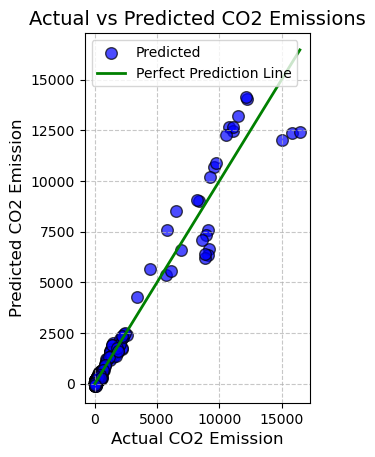

In [232]:
# Plot Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=70, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual CO2 Emission', fontsize=12)
plt.ylabel('Predicted CO2 Emission', fontsize=12)
plt.title('Actual vs Predicted CO2 Emissions', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

### Plot Residual Analysis

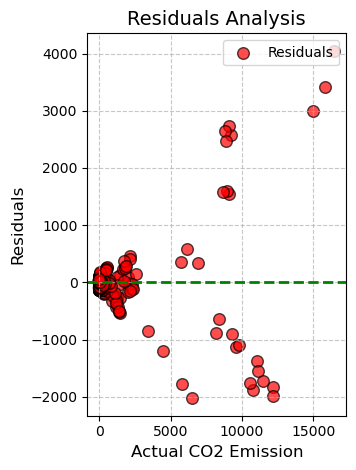

In [233]:
# Plot Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='red', edgecolor='k', alpha=0.7, s=70, label='Residuals')
plt.axhline(y=0, color='green', linestyle='--', linewidth=2)
plt.xlabel('Actual CO2 Emission', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals Analysis', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()